In [2]:
from datetime import datetime
import time
import numpy as np
import pandas as pd
from pykrx import stock

In [2]:
"""
Class Template
"""

class DivStockAnalyzer():
    """
    market: KOSPI, KOSDAQ
    """
    def __init__(self, market='KOSPI'):
        pass
    
    """
    get top 100 by dividend yield
    """
    def get_div_stock_top_100(self):
        pass
        
    """
    get dividend stock exceeds PER, PBR, DIV mean of top 100
    """
    def get_nice_div_stock(self):
        pass

    """
    get stock fundanmental information
    """
    def __get_stock_fundamental__(self, date, ticker):
        pass



In [23]:
class DivStockAnalyzer():
    """
    market: KOSPI, KOSDAQ
    """
    def __init__(self, market, date):
        self.market = market
        self.date = date

    """
    get top 100 by dividend yield
    """
    def get_div_stock_top_100(self):
        # 상장 주식을 시가총액 순으로 가져 오기
        df_stock = stock.get_market_cap(latest_date, market=self.market)

        #시총 상위 200개 주가 펀더멘탈 정보 가져 오기
        df_top_200 = None
        for idx, ticker in enumerate(df_stock.head(200).index):
            try:
                df_stock_fundamental = self.__get_stock_fundamental__(self.date, ticker)
                #display(df_stock_fundamental)
                if df_top_200 is None:
                    df_top_200 = df_stock_fundamental
                else:
                    df_top_200 = pd.concat([df_top_200, df_stock_fundamental])
                print(f'Code = {ticker} [******100%*****] {idx+1:03d} of {200} completed')
                time.sleep(3)
            except Exception as e:
                print(f'Code = {ticker} [--0%--] {idx+1:03d} of {200} exception happends !')
                print(e)
                
        # DPS 가 0인 주식 제거
        df_div_stock = df_top_200.drop(df_top_200.loc[df_top_200['DPS'] == 0].index)
        # DPS 가 NaN인 주식 제거
        df_div_stock.dropna()
        # 배당률 순으로 내림차순 정렬
        df_div_stock.sort_values('DIV', ascending=False, inplace=True)
        self.df_div_stock_top_100 = df_div_stock.head(100)
        return self.df_div_stock_top_100


    """
    get dividend stock exceeds PER, PBR, DIV mean of top 100
    """
    def get_nice_div_stock(self):
        # 배당금 상위 100개 기업 평균 데이터
        df_div_stock_top_100_mean = self.df_div_stock_top_100[['PER', 'PBR', 'DIV']].mean()
        # 배당금 상위 100개 중 PER, PBR, DIV 기준 평균 초과 기업, 
        self.df__div_top_100_over_mean = self.df_div_stock_top_100[
                     (self.df_div_stock_top_100['PER'] < df_div_stock_top_100_mean['PER']) &
                     (self.df_div_stock_top_100['PBR'] < df_div_stock_top_100_mean['PBR']) &
                     (self.df_div_stock_top_100['DIV'] > df_div_stock_top_100_mean['DIV'])]

        return self.df__div_top_100_over_mean

    """
    get stock fundanmental information
    """
    def __get_stock_fundamental__(self, date, ticker):
        # 펀더멘탈 정보 읽어 오기
        df_stock = stock.get_market_fundamental(date, date, ticker)
        # 인덱스 이름 제거
        df_stock.index.name = None
        # 인덱스를 티커로 변경
        df_stock.index = [ticker]
        # 이름 읽어 오기
        name = stock.get_market_ticker_name(ticker)
        # 첫 번째 열에 삽입하기
        df_stock.insert(0, 'Name', name)
        # 주식 데이터 리턴
        return df_stock

"""
Test DivStockAnalyzer
"""

In [27]:
latest_date = '20230210'
kospiDivStockAnalyzer = DivStockAnalyzer('KOSPI', latest_date)

In [28]:
df_div_stock_top_100 = kospiDivStockAnalyzer.get_div_stock_top_100()

Code = 005930 [******100%*****] 001 of 200 completed
Code = 373220 [******100%*****] 002 of 200 completed
Code = 000660 [******100%*****] 003 of 200 completed
Code = 207940 [******100%*****] 004 of 200 completed
Code = 006400 [******100%*****] 005 of 200 completed
Code = 051910 [******100%*****] 006 of 200 completed
Code = 005935 [******100%*****] 007 of 200 completed
Code = 035420 [******100%*****] 008 of 200 completed
Code = 005380 [******100%*****] 009 of 200 completed
Code = 035720 [******100%*****] 010 of 200 completed
Code = 000270 [******100%*****] 011 of 200 completed
Code = 005490 [******100%*****] 012 of 200 completed
Code = 068270 [******100%*****] 013 of 200 completed
Code = 105560 [******100%*****] 014 of 200 completed
Code = 028260 [******100%*****] 015 of 200 completed
Code = 055550 [******100%*****] 016 of 200 completed
Code = 012330 [******100%*****] 017 of 200 completed
Code = 066570 [******100%*****] 018 of 200 completed
Code = 003670 [******100%*****] 019 of 200 com

Code = 004000 [******100%*****] 156 of 200 completed
Code = 011210 [******100%*****] 157 of 200 completed
Code = 010120 [******100%*****] 158 of 200 completed
Code = 051600 [******100%*****] 159 of 200 completed
Code = 004800 [******100%*****] 160 of 200 completed
Code = 285130 [******100%*****] 161 of 200 completed
Code = 069620 [******100%*****] 162 of 200 completed
Code = 336370 [******100%*****] 163 of 200 completed
Code = 069960 [******100%*****] 164 of 200 completed
Code = 000150 [******100%*****] 165 of 200 completed
Code = 267260 [******100%*****] 166 of 200 completed
Code = 145720 [******100%*****] 167 of 200 completed
Code = 375500 [******100%*****] 168 of 200 completed
Code = 139130 [******100%*****] 169 of 200 completed
Code = 000240 [******100%*****] 170 of 200 completed
Code = 089590 [******100%*****] 171 of 200 completed
Code = 114090 [******100%*****] 172 of 200 completed
Code = 001120 [******100%*****] 173 of 200 completed
Code = 014820 [******100%*****] 174 of 200 com

In [29]:
df_div_stock_top_100

,Name,BPS,PER,PBR,EPS,DIV,DPS
298020,효성티앤씨,329152.0,2.43,1.32,178503.0,11.53,50000.0
016360,삼성증권,68096.0,3.18,0.50,10810.0,11.06,3800.0
005940,NH투자증권,21630.0,3.13,0.44,3071.0,10.93,1050.0
071050,한국금융지주,126688.0,2.07,0.49,30208.0,9.86,6150.0
004800,효성,131860.0,3.16,0.53,22012.0,9.35,6500.0
...,...,...,...,...,...,...,...
051910,LG화학,278455.0,14.29,2.42,47108.0,1.78,12000.0
005300,롯데칠성,143885.0,12.78,1.18,13341.0,1.76,3000.0
051900,LG생활건강,321556.0,13.87,2.17,50395.0,1.72,12000.0
028670,팬오션,6728.0,5.78,0.88,1028.0,1.68,100.0


In [30]:
df_nice_div_stock = kospiDivStockAnalyzer.get_nice_div_stock()
df_nice_div_stock

,Name,BPS,PER,PBR,EPS,DIV,DPS
016360,삼성증권,68096.0,3.18,0.50,10810.0,11.06,3800.0
005940,NH투자증권,21630.0,3.13,0.44,3071.0,10.93,1050.0
071050,한국금융지주,126688.0,2.07,0.49,30208.0,9.86,6150.0
004800,효성,131860.0,3.16,0.53,22012.0,9.35,6500.0
267250,HD현대,89404.0,0.00,0.67,0.0,9.23,5550.0
036460,한국가스공사,103337.0,2.86,0.31,11078.0,8.62,2728.0
139130,DGB금융지주,32507.0,2.70,0.24,2886.0,8.10,630.0
138930,BNK금융지주,28745.0,3.00,0.24,2341.0,7.97,560.0
375500,DL이앤씨,194338.0,1.30,0.18,26903.0,7.71,2700.0
024110,기업은행,34345.0,3.62,0.30,2877.0,7.49,780.0


In [31]:
"""
코스닥 고배당주, 저평가 배당주 찾기
"""
latest_date = '20230210'
kosdaqDivStockAnalyzer = DivStockAnalyzer('KOSDAQ', latest_date)

In [32]:
df_kosdaq_div_stock_top_100 = kosdaqDivStockAnalyzer.get_div_stock_top_100()
df_kosdaq_div_stock_top_100

Code = 247540 [******100%*****] 001 of 200 completed
Code = 091990 [******100%*****] 002 of 200 completed
Code = 066970 [******100%*****] 003 of 200 completed
Code = 086520 [******100%*****] 004 of 200 completed
Code = 293490 [******100%*****] 005 of 200 completed
Code = 028300 [******100%*****] 006 of 200 completed
Code = 263750 [******100%*****] 007 of 200 completed
Code = 048260 [******100%*****] 008 of 200 completed
Code = 041510 [******100%*****] 009 of 200 completed
Code = 058470 [******100%*****] 010 of 200 completed
Code = 035900 [******100%*****] 011 of 200 completed
Code = 278280 [******100%*****] 012 of 200 completed
Code = 253450 [******100%*****] 013 of 200 completed
Code = 035760 [******100%*****] 014 of 200 completed
Code = 068760 [******100%*****] 015 of 200 completed
Code = 196170 [******100%*****] 016 of 200 completed
Code = 214370 [******100%*****] 017 of 200 completed
Code = 032190 [******100%*****] 018 of 200 completed
Code = 005290 [******100%*****] 019 of 200 com

Code = 058610 [******100%*****] 156 of 200 completed
Code = 118990 [******100%*****] 157 of 200 completed
Code = 101730 [******100%*****] 158 of 200 completed
Code = 063170 [******100%*****] 159 of 200 completed
Code = 099190 [******100%*****] 160 of 200 completed
Code = 204270 [******100%*****] 161 of 200 completed
Code = 950130 [******100%*****] 162 of 200 completed
Code = 023160 [******100%*****] 163 of 200 completed
Code = 036030 [******100%*****] 164 of 200 completed
Code = 099320 [******100%*****] 165 of 200 completed
Code = 115450 [******100%*****] 166 of 200 completed
Code = 267980 [******100%*****] 167 of 200 completed
Code = 179290 [******100%*****] 168 of 200 completed
Code = 080160 [******100%*****] 169 of 200 completed
Code = 319400 [******100%*****] 170 of 200 completed
Code = 041190 [******100%*****] 171 of 200 completed
Code = 064260 [******100%*****] 172 of 200 completed
Code = 119610 [******100%*****] 173 of 200 completed
Code = 003800 [******100%*****] 174 of 200 com

,Name,BPS,PER,PBR,EPS,DIV,DPS
046890,서울반도체,12942.0,12.47,0.85,878.0,4.20,460.0
029960,코엔텍,3123.0,12.32,2.35,596.0,4.09,300.0
091700,파트론,8249.0,6.64,1.05,1309.0,4.03,350.0
003800,에이스침대,54880.0,5.60,0.64,6231.0,3.81,1330.0
096530,씨젠,20971.0,2.58,1.28,10359.0,3.74,1000.0
...,...,...,...,...,...,...,...
179900,유티아이,3838.0,289.51,6.11,81.0,0.21,50.0
030960,양지사,13428.0,0.00,2.10,0.0,0.18,50.0
140860,파크시스템스,13125.0,100.29,10.40,1361.0,0.18,250.0
041510,에스엠,26333.0,19.95,4.36,5750.0,0.17,200.0


In [33]:
df_kosdaq_div_stock_top_100

,Name,BPS,PER,PBR,EPS,DIV,DPS
046890,서울반도체,12942.0,12.47,0.85,878.0,4.20,460.0
029960,코엔텍,3123.0,12.32,2.35,596.0,4.09,300.0
091700,파트론,8249.0,6.64,1.05,1309.0,4.03,350.0
003800,에이스침대,54880.0,5.60,0.64,6231.0,3.81,1330.0
096530,씨젠,20971.0,2.58,1.28,10359.0,3.74,1000.0
...,...,...,...,...,...,...,...
179900,유티아이,3838.0,289.51,6.11,81.0,0.21,50.0
030960,양지사,13428.0,0.00,2.10,0.0,0.18,50.0
140860,파크시스템스,13125.0,100.29,10.40,1361.0,0.18,250.0
041510,에스엠,26333.0,19.95,4.36,5750.0,0.17,200.0


In [36]:
df_kosdaq_div_stock_top_100.describe()

,BPS,PER,PBR,EPS,DIV,DPS
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,19831.420000,30.002200,3.187900,2944.780000,1.198900,467.310000
std,23229.902993,57.082309,3.174523,3236.454156,0.983293,589.747193
min,1206.000000,0.000000,0.390000,0.000000,0.160000,30.000000
25%,8389.750000,9.037500,1.537500,744.000000,0.587500,137.500000
50%,13191.000000,13.390000,2.210000,1880.500000,0.850000,300.000000
75%,21600.250000,25.282500,3.502500,4137.750000,1.492500,500.000000
max,182220.000000,449.150000,22.230000,19124.000000,4.200000,3500.000000


In [34]:
df_kosdaq_nice_div_stock = kosdaqDivStockAnalyzer.get_nice_div_stock()
df_kosdaq_nice_div_stock

,Name,BPS,PER,PBR,EPS,DIV,DPS
046890,서울반도체,12942.0,12.47,0.85,878.0,4.20,460.0
029960,코엔텍,3123.0,12.32,2.35,596.0,4.09,300.0
091700,파트론,8249.0,6.64,1.05,1309.0,4.03,350.0
003800,에이스침대,54880.0,5.60,0.64,6231.0,3.81,1330.0
096530,씨젠,20971.0,2.58,1.28,10359.0,3.74,1000.0
319660,피에스케이,9888.0,6.87,1.82,2615.0,3.34,600.0
056190,에스에프에이,31340.0,11.31,1.17,3254.0,3.18,1170.0
095610,테스,15906.0,4.57,1.13,3936.0,3.12,560.0
035600,KG이니시스,13469.0,7.42,1.00,1808.0,2.98,400.0
215200,메가스터디교육,28762.0,10.24,2.45,6893.0,2.83,2000.0


In [37]:
df_kosdaq_nice_div_stock.describe()

,BPS,PER,PBR,EPS,DIV,DPS
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,25951.909091,9.809697,1.636667,4012.000000,2.313030,710.757576
std,34672.996060,4.580231,0.818534,3467.981582,0.939786,713.250834
min,3123.000000,2.580000,0.390000,190.000000,1.250000,75.000000
25%,8886.000000,6.360000,0.920000,1092.000000,1.530000,300.000000
50%,13469.000000,9.610000,1.600000,3254.000000,2.010000,460.000000
75%,28881.000000,12.320000,2.350000,4854.000000,2.980000,1000.000000
max,182220.000000,18.900000,3.020000,12167.000000,4.200000,3500.000000


In [5]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

In [6]:
df_kosdaq_nice_div_stock = pd.read_excel('KOSDAQ_저평가_배당주_20230210.xlsx')

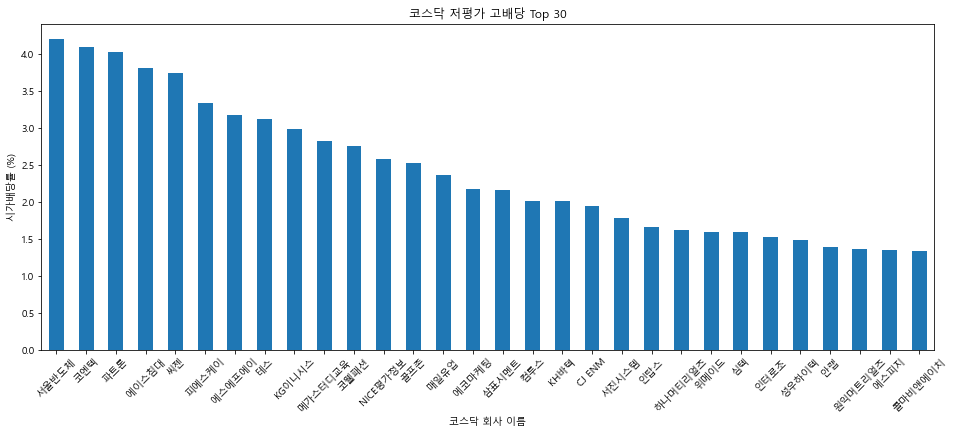

In [12]:
plt.figure(figsize=(16,6))
plt.title('코스닥 저평가 고배당 Top 30')
df_kosdaq_nice_30 = df_kosdaq_nice_div_stock.head(30)
df_kosdaq_nice_30.index = df_kosdaq_nice_30['Name']
df_kosdaq_nice_30['DIV'].plot(kind='bar')
plt.xlabel('코스닥 회사 이름')
plt.ylabel('시가배당률 (%)')
plt.xticks(rotation=45)
plt.show()

In [51]:
market = 'KOSDAQ'
excel_file_name = market+'_고배당_탑100_'+latest_date+'.xlsx'
df_kosdaq_div_stock_top_100.to_excel(excel_file_name)
excel_file_name = market+'_저평가_배당주_'+latest_date+'.xlsx'
df_kosdaq_nice_div_stock.to_excel(excel_file_name)

In [8]:
"""
코스피, 코스닥 고배당 탑 100, 저평가 배당주 리스트를 만들고 엑셀로 저장하기
"""

latest_date = '20230210'
markets = ['KOSPI', 'KOSDAQ']
for market in markets:
    divStockAnalyzer = DivStockAnalyzer(market, latest_date)

    div_stock_top_100 = divStockAnalyzer.get_div_stock_top_100()
    excel_file_name = market+'_고배당_탑100_'+latest_date+'.xlsx'
    div_stock_top_100.to_excel(excel_file_name)
    print(f'{excel_file_name} was saved ~')

    nice_div_stock = divStockAnalyzer.get_nice_div_stock()
    excel_file_name = market+'_저평가_배당주_'+latest_date+'.xlsx'
    nice_div_stock.to_excel(excel_file_name)
    print(f'{excel_file_name} was saved ~')
    
print('코스피, 코스닥 고배당 탑 100, 저평가 배당주 리스트를 만들고 엑셀로 저장 완료 ~')

Code = 005930 [******100%*****] 001 of 200 completed
Code = 373220 [******100%*****] 002 of 200 completed
Code = 000660 [******100%*****] 003 of 200 completed
Code = 207940 [******100%*****] 004 of 200 completed
Code = 006400 [******100%*****] 005 of 200 completed
Code = 051910 [******100%*****] 006 of 200 completed
Code = 005935 [******100%*****] 007 of 200 completed
Code = 035420 [******100%*****] 008 of 200 completed
Code = 005380 [******100%*****] 009 of 200 completed
Code = 035720 [******100%*****] 010 of 200 completed
Code = 000270 [******100%*****] 011 of 200 completed
Code = 005490 [******100%*****] 012 of 200 completed
Code = 068270 [******100%*****] 013 of 200 completed
Code = 105560 [******100%*****] 014 of 200 completed
Code = 028260 [******100%*****] 015 of 200 completed
Code = 055550 [******100%*****] 016 of 200 completed
Code = 012330 [******100%*****] 017 of 200 completed
Code = 066570 [******100%*****] 018 of 200 completed
Code = 003670 [******100%*****] 019 of 200 com

Code = 004000 [******100%*****] 156 of 200 completed
Code = 011210 [******100%*****] 157 of 200 completed
Code = 010120 [******100%*****] 158 of 200 completed
Code = 051600 [******100%*****] 159 of 200 completed
Code = 004800 [******100%*****] 160 of 200 completed
Code = 285130 [******100%*****] 161 of 200 completed
Code = 069620 [******100%*****] 162 of 200 completed
Code = 336370 [******100%*****] 163 of 200 completed
Code = 069960 [******100%*****] 164 of 200 completed
Code = 000150 [******100%*****] 165 of 200 completed
Code = 267260 [******100%*****] 166 of 200 completed
Code = 145720 [******100%*****] 167 of 200 completed
Code = 375500 [******100%*****] 168 of 200 completed
Code = 139130 [******100%*****] 169 of 200 completed
Code = 000240 [******100%*****] 170 of 200 completed
Code = 089590 [******100%*****] 171 of 200 completed
Code = 114090 [******100%*****] 172 of 200 completed
Code = 001120 [******100%*****] 173 of 200 completed
Code = 014820 [******100%*****] 174 of 200 com

Code = 089980 [******100%*****] 112 of 200 completed
Code = 323990 [******100%*****] 113 of 200 completed
Code = 319660 [******100%*****] 114 of 200 completed
Code = 091700 [******100%*****] 115 of 200 completed
Code = 068240 [******100%*****] 116 of 200 completed
Code = 217270 [******100%*****] 117 of 200 completed
Code = 131970 [******100%*****] 118 of 200 completed
Code = 182400 [******100%*****] 119 of 200 completed
Code = 290670 [******100%*****] 120 of 200 completed
Code = 043150 [******100%*****] 121 of 200 completed
Code = 290650 [******100%*****] 122 of 200 completed
Code = 289220 [******100%*****] 123 of 200 completed
Code = 328130 [******100%*****] 124 of 200 completed
Code = 049070 [******100%*****] 125 of 200 completed
Code = 099430 [******100%*****] 126 of 200 completed
Code = 036810 [******100%*****] 127 of 200 completed
Code = 107600 [******100%*****] 128 of 200 completed
Code = 006730 [******100%*****] 129 of 200 completed
Code = 183300 [******100%*****] 130 of 200 com

JSONDecodeError: [Errno Expecting value] <HTML><HEAD>
<TITLE>Access Denied</TITLE>
</HEAD><BODY>
<H1>Access Denied</H1>
 
You don't have permission to access "http&#58;&#47;&#47;data&#46;krx&#46;co&#46;kr&#47;comm&#47;bldAttendant&#47;getJsonData&#46;cmd" on this server.<P>
Reference&#32;&#35;18&#46;6f88fe79&#46;1676076083&#46;ed2f3c9
</BODY>
</HTML>
: 0